# Итерационные методы

## Задача 2. Метод Якоби.

Реализуйте метод итераций для решения системы линейных уравнений (метод Якоби). Для этого перепишите уравнение $A x=b$, выделив диагональную часть матрицы $A$ :

$$
A=D+(A-D),
$$

в виде

$$
x_{n+1}=B x_n+c,
$$

где $B=D^{-1}(D-A)$. Найдите $c$.
Создайте случайную матрицу с диагональным доминированием. 

In [ ]:
import random
import numpy as np
import scipy.linalg as scl

В результате простых вычислений выяснилось, что $c = D^{-1} b$

In [ ]:
def jacobi(A, b, e):
    x = np.matrix(np.zeros((A.shape[0], 1)))
    D = np.diagflat(np.diag(A))
    B = scl.inv(D) @ (D - A)
    
    r = A * x - b
    
    while (scl.norm(r, 2) > e) & (scl.norm(r, 2) < 1e3):
        x = scl.inv(D) * b + B * x
        r = A*x - b
        
    return x

Сгенерируем случайную матрицу:

In [ ]:
num_rows = 5
num_cols = 5

random_mat = np.matrix(np.random.random((num_rows, num_cols)))

random_terms = np.matrix(np.random.random((num_rows, 1)) )

In [ ]:
print(random_mat)

[[0.19538191 0.23950399 0.27735993 0.62944698 0.0375272 ]
 [0.05686101 0.70590881 0.38811595 0.11429311 0.69336361]
 [0.43183299 0.42348292 0.38164553 0.71656471 0.15307806]
 [0.39536883 0.83948494 0.41344058 0.71325415 0.81328309]
 [0.68750124 0.45681181 0.03470896 0.09798759 0.73045661]]


Как видно, у созданной матрицы нет диагонального доминирования. Добавим:

In [ ]:
random_mat = random_mat + 6*np.eye(random_mat.shape[0])

In [ ]:
print(random_mat)

print(random_terms)

[[6.19538191 0.23950399 0.27735993 0.62944698 0.0375272 ]
 [0.05686101 6.70590881 0.38811595 0.11429311 0.69336361]
 [0.43183299 0.42348292 6.38164553 0.71656471 0.15307806]
 [0.39536883 0.83948494 0.41344058 6.71325415 0.81328309]
 [0.68750124 0.45681181 0.03470896 0.09798759 6.73045661]]
[[0.95626246]
 [0.52052629]
 [0.3217322 ]
 [0.0616871 ]
 [0.90973483]]


Теперь проверим, что метод сходится:

In [ ]:
x = jacobi(random_mat, random_terms, 1e-15)

print(x)
print('---------------------')
print(random_mat * x - random_terms)

[[ 0.15204023]
 [ 0.06271633]
 [ 0.03586764]
 [-0.02381427]
 [ 0.11554134]]
---------------------
[[3.33066907e-16]
 [0.00000000e+00]
 [1.66533454e-16]
 [1.11022302e-16]
 [2.22044605e-16]]


## Задача 4. Асимпотика метода Гивенса.

Покажите, что при больших n метод Гивенса требует
$$
\approx 4 n^3 / 3
$$
  действий умножения.  Докажите, что метод Гаусса требует примерно в 4 раза меньше.  

Примените и тот, и другой метод для решения систем уравнений, используя библиотечные функции, и продемонстрируйте эту разницу измерением времени работы.

In [ ]:
import numpy as np

rnd = np.random. RandomState (1234)
n = 100
A = rnd.uniform(size = (n, n)) + np.diag([15] * n)
b = rnd.uniform(size = n)

Создадим функцию, которая решает систему через $QR$ разложение. $Ax = b \Rightarrow QRx = b \Rightarrow Q^TQRx = Q^Tb \Rightarrow x = R^{-1}Q^Tb$

In [ ]:
def QRsolve(A, b):
    Q, R = np.linalg.qr(A)
    return np.linalg.inv(R) @ Q.T @ b

Измерим времена выполнения:

In [ ]:
%timeit -n50 -r 7 np.linalg.solve(A, b) #библиотечная реализация

144 µs ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
%timeit -n50 -r 7 QRsolve(A, b) #реализация через QR-разложение

1.03 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


имеем разницу в 7 раз......

## Задача 5. Уравнение Пуассона методом Зейделя

In [ ]:
import numpy as np
from scipy.linalg import block_diag

Рассмотрим систему линейных уравнений, матрица правой части которой является "ленточной" и имеет следующую структуру: ненулевые элементы расположены на трех центральных диагонялях и на двух "крыльях". Матрицы такой структуры возникают, например, при решении задачи на нахождение электростатического потенциала $\phi(x, y)$, создаваемого двумерным распределением заряда $\rho(x, y)$ при дискретизации на сетке уравнения Пуассона

$$
\Delta \phi=-4 \pi \rho .
$$

Размер матрицы растет с уменьшением шага сетки $h$ как $O\left(1 / h^2\right)$. Таким образом, приходится иметь дело с разреженными матрицами огромного размера.
Матрицу m создадим следующим образом:

In [ ]:
n = 5

# Диагональный блок
a = np.zeros((n-1, n-1))

idx = np.arange(n-1)

a[idx, idx] = -4
a[idx[:-1], idx[:-1]+1] = 1
a[idx[1:], idx[1:]-1] = 1

# собираем блочно-диагональную `m`
m = block_diag(a, a, a, a, a)

# заполняем "крылья"
idx = np.arange(m.shape[0])

m[idx[:-n+1], idx[:-n+1] + n-1] = 1
m[idx[n-1:], idx[n-1:] - n+1] = 1

In [ ]:
with np.printoptions(linewidth=99):
    print(m)

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0

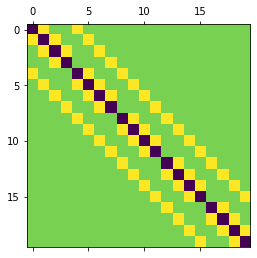

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(m)
plt.show()

Зададим вектор правой части системы 

In [ ]:
b = np.zeros(m.shape[0])
b[m.shape[0]//2] = -1

Составить функцию, вычисляющую решение системы уравнений $m x=b$ методом Зейделя с заданной точностью $\epsilon$. Прокоментировать зависимость числа итераций, требуемых для достижения заданной точности, от $\epsilon$. 

НАПИШЕМ ФУНКЦИЮ:

In [ ]:
def zeidel(m, b, e):
    n = np.size(b)
    D = np.diag(np.diag(m))
    L = np.tril(m) - D
    U = np.triu(m) - D
    R = -np.linalg.inv(L + D) @ U
    q = np.linalg.norm(R)
    c = np.linalg.inv(L + D) @ b
    iters = 0
    
    x0 = rnd.uniform(size = n)
    while(np.linalg.norm(m @ x0 - b) > e): 
        x0 = R @ x0.T + c
        
        iters = iters + 1
    return x0, iters, q

In [ ]:
zeidel(m, b, 0.0001)

(array([0.02604879, 0.05137607, 0.06556609, 0.03892392, 0.05279076,
        0.11385811, 0.17194182, 0.09012098, 0.07122217, 0.17928797,
        0.41819745, 0.14960985, 0.0527805 , 0.11384419, 0.17193017,
        0.09011494, 0.02603674, 0.05135975, 0.06555242, 0.03891684]),
 28,
 1.5180399683211212)

ПРОКОММЕНТИРУЕМ ЗАВИСИМОСТЬ ИТЕРАЦИЙ ОТ ТОЧНОСТИ:

In [ ]:
Iters = []

e = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
for i in e:
    x1, iters, q =  zeidel(m, b, i)
    
    Iters.append(iters)

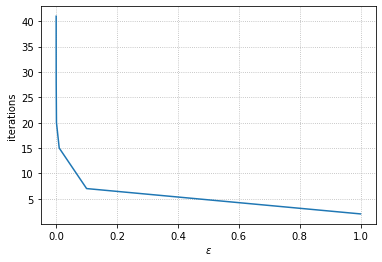

In [ ]:
plt.plot(e, Iters)
plt.xlabel("$\epsilon$")
plt.ylabel("iterations")
plt.grid(True, linestyle=':')
plt.show()

в логарифмическом масштабе наблюдаем линейный рост числа итераций с уменьшением точности:

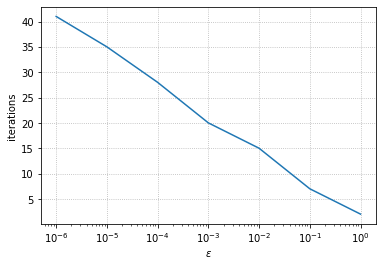

In [ ]:
plt.xscale('log')
plt.plot(e, Iters)
plt.xlabel("$\epsilon$")
plt.ylabel("iterations")
plt.grid(True, linestyle=':')
plt.show()